<a href="https://colab.research.google.com/github/keshavrajbux/InsuranceFraudDetection/blob/main/InsuranceFraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
!matplotlib inline

/bin/bash: line 1: matplotlib: command not found


In [ ]:
df = pd.read_excel('../input/insurance-fraud-detection/Worksheet in Case Study question 2.xlsx')

In [ ]:
df1= pd.read_excel('../input/insurance-fraud-detection/Worksheet in Case Study question 2.xlsx')

In [ ]:
df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N
999,456,60,556080,1996-11-11,OH,250/500,1000,766.19,0,612260,...,3,?,5060,460,920,3680,Mercedes,E400,2007,N


In [ ]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [ ]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [ ]:
#replace ? with NaN
df=df.replace('?',np.NaN)

In [ ]:
df.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [ ]:
fraud_reported = df['fraud_reported'].value_counts()

In [ ]:
fraud_reported

N    753
Y    247
Name: fraud_reported, dtype: int64

In [ ]:
df['collision_type'].fillna(df['collision_type'].mode()[0],inplace=True)
df['property_damage'].fillna('NO', inplace = True)
df['police_report_available'].fillna('NO', inplace = True)

In [ ]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [ ]:
fraud = df['fraud_reported'].value_counts()

label_fraud = fraud.index
size_fraud = fraud.values

In [ ]:
label_fraud

Index(['N', 'Y'], dtype='object')

In [ ]:
size_fraud

array([753, 247])

In [ ]:
data = df.copy()

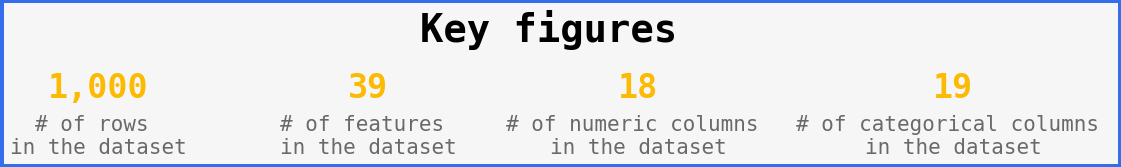

In [ ]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
df_dtypes = data.dtypes.value_counts()

fig = plt.figure(figsize=(5,2),facecolor='white')

ax = fig.add_subplot(1,1,1)
font = 'monospace'
ax.text(1, 0.8, "Key figures",color='black',fontsize=28, fontweight='bold', fontfamily=font, ha='center')

ax.text(0, 0.4, "{:,d}".format(data.shape[0]), color='#fcba03', fontsize=24, fontweight='bold', fontfamily=font, ha='center')
ax.text(0, 0.001, "# of rows \nin the dataset",color='dimgrey',fontsize=15, fontweight='light', fontfamily=font,ha='center')

ax.text(0.6, 0.4, "{}".format(data.shape[1]), color='#fcba03', fontsize=24, fontweight='bold', fontfamily=font, ha='center')
ax.text(0.6, 0.001, "# of features \nin the dataset",color='dimgrey',fontsize=15, fontweight='light', fontfamily=font,ha='center')

ax.text(1.2, 0.4, "{}".format(len(data.select_dtypes(np.number).columns)), color='#fcba03', fontsize=24, fontweight='bold', fontfamily=font, ha='center')
ax.text(1.2, 0.001, "# of numeric columns \nin the dataset",color='dimgrey',fontsize=15, fontweight='light', fontfamily=font, ha='center')

ax.text(1.9, 0.4,"{}".format(len(data.select_dtypes(object).columns)), color='#fcba03', fontsize=24, fontweight='bold', fontfamily=font, ha='center')
ax.text(1.9, 0.001,"# of categorical columns \nin the dataset",color='dimgrey',fontsize=15, fontweight='light', fontfamily=font,ha='center')

# ax.text(2.6, 0.4,"{}".format(len(data.select_dtypes('datetime').columns)), color='#fcba03', fontsize=24, fontweight='bold', fontfamily=font, ha='center')
# ax.text(1.9, 0.001,"# of datetime columns \nin the dataset",color='dimgrey',fontsize=15, fontweight='light', fontfamily=font,ha='center')

ax.set_yticklabels('')
ax.tick_params(axis='y',length=0)
ax.tick_params(axis='x',length=0)
ax.set_xticklabels('')

for direction in ['top','right','left','bottom']:
    ax.spines[direction].set_visible(False)

fig.subplots_adjust(top=0.9, bottom=0.2, left=0, hspace=1)

fig.patch.set_linewidth(5)
fig.patch.set_edgecolor('#346eeb')
fig.patch.set_facecolor('#f6f6f6')
ax.set_facecolor('#f6f6f6')

plt.show()

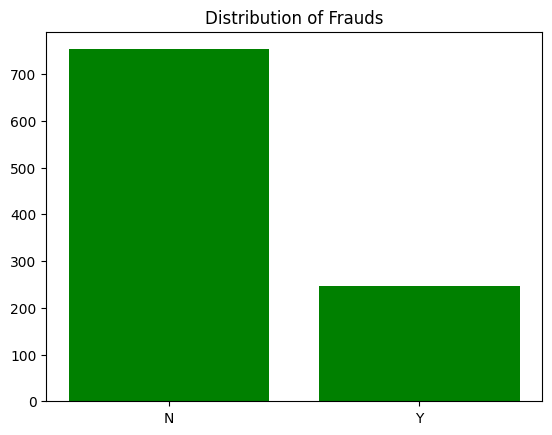

In [ ]:
plt.bar(label_fraud,size_fraud, color='g')
plt.title("Distribution of Frauds")
plt.show()

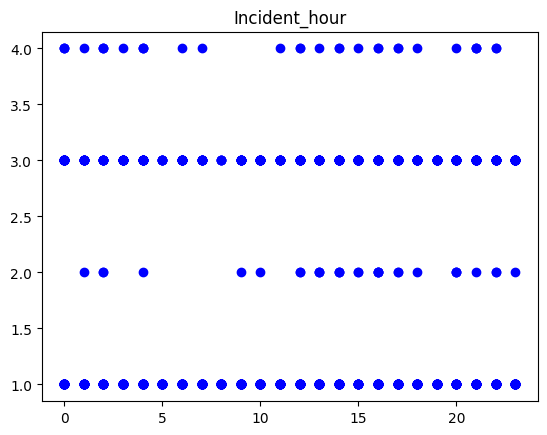

In [ ]:
plt.scatter(df['incident_hour_of_the_day'],df['number_of_vehicles_involved'], color='b')
plt.title("Incident_hour")
plt.show()

<ipython-input-23-7323627c3778>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x = df['property_damage'], y = df['property_claim'], palette = 'bone')


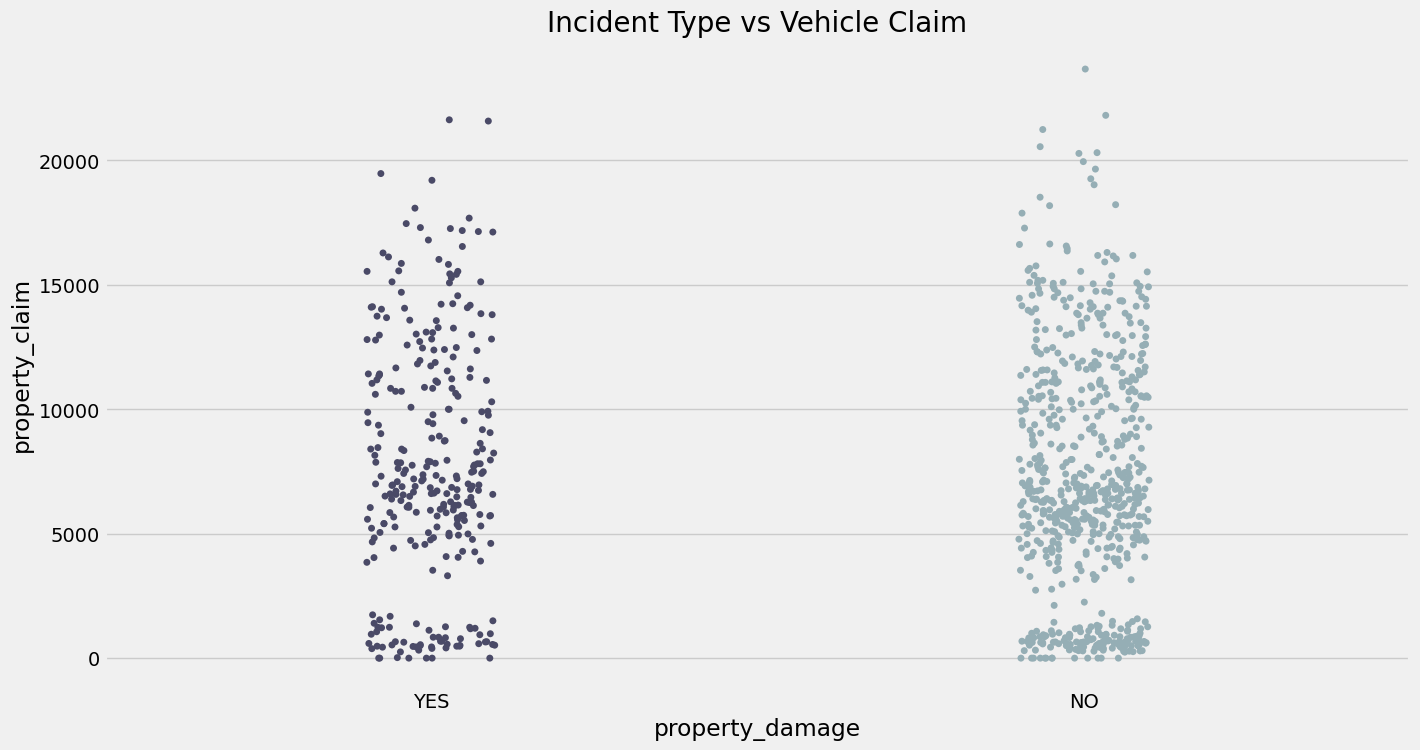

In [ ]:
# Set the style and figure size
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

# Create the stripplot
sns.stripplot(x = df['property_damage'], y = df['property_claim'], palette = 'bone')

# Set the title
plt.title('Incident Type vs Vehicle Claim', fontsize = 20)

# Show the plot
plt.show()

<ipython-input-24-49c31af44099>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = df['incident_type'], y = df['vehicle_claim'], palette = 'pink')


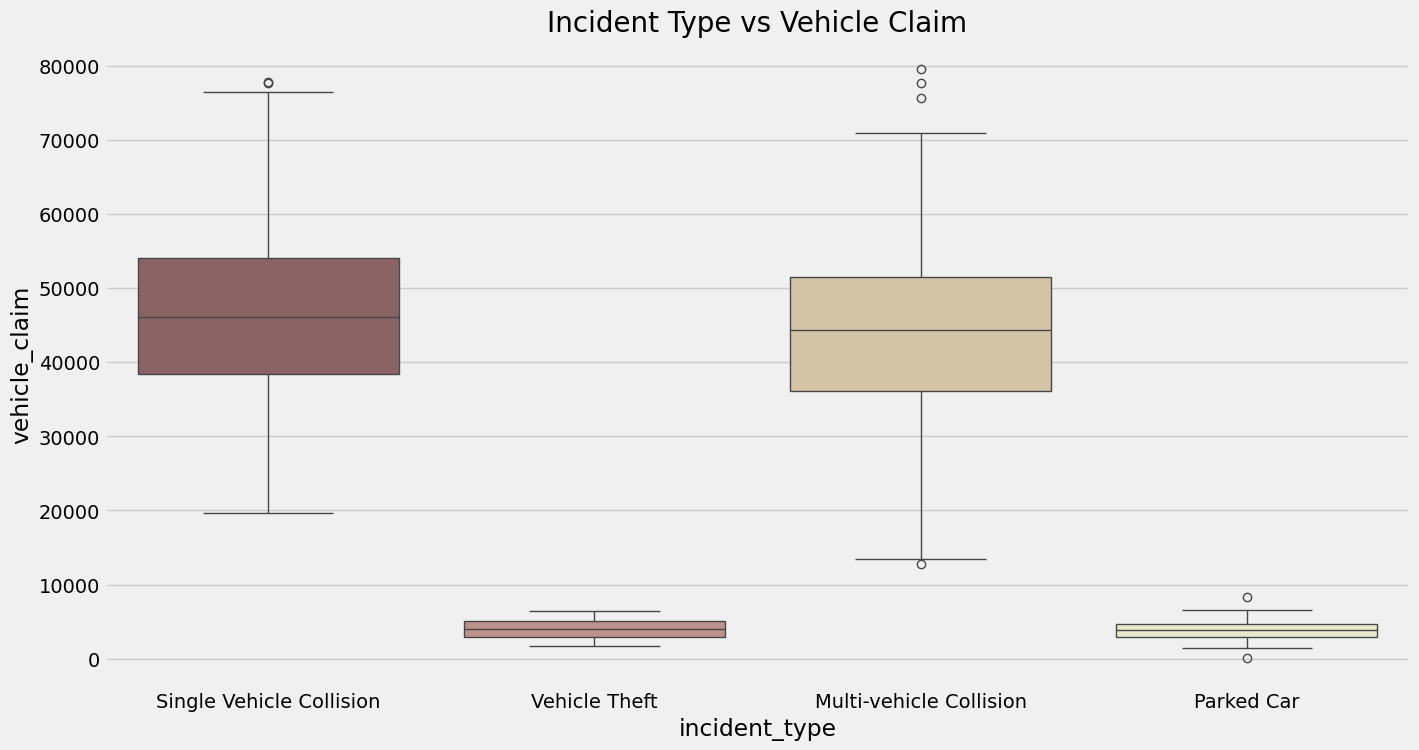

In [ ]:
# Set the style and figure size
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

# Create the boxplot
sns.boxplot(x = df['incident_type'], y = df['vehicle_claim'], palette = 'pink')

# Set the title
plt.title('Incident Type vs Vehicle Claim', fontsize = 20)

# Show the plot
plt.show()

In [ ]:
incident=pd.crosstab(df['incident_city'], df['incident_type'])

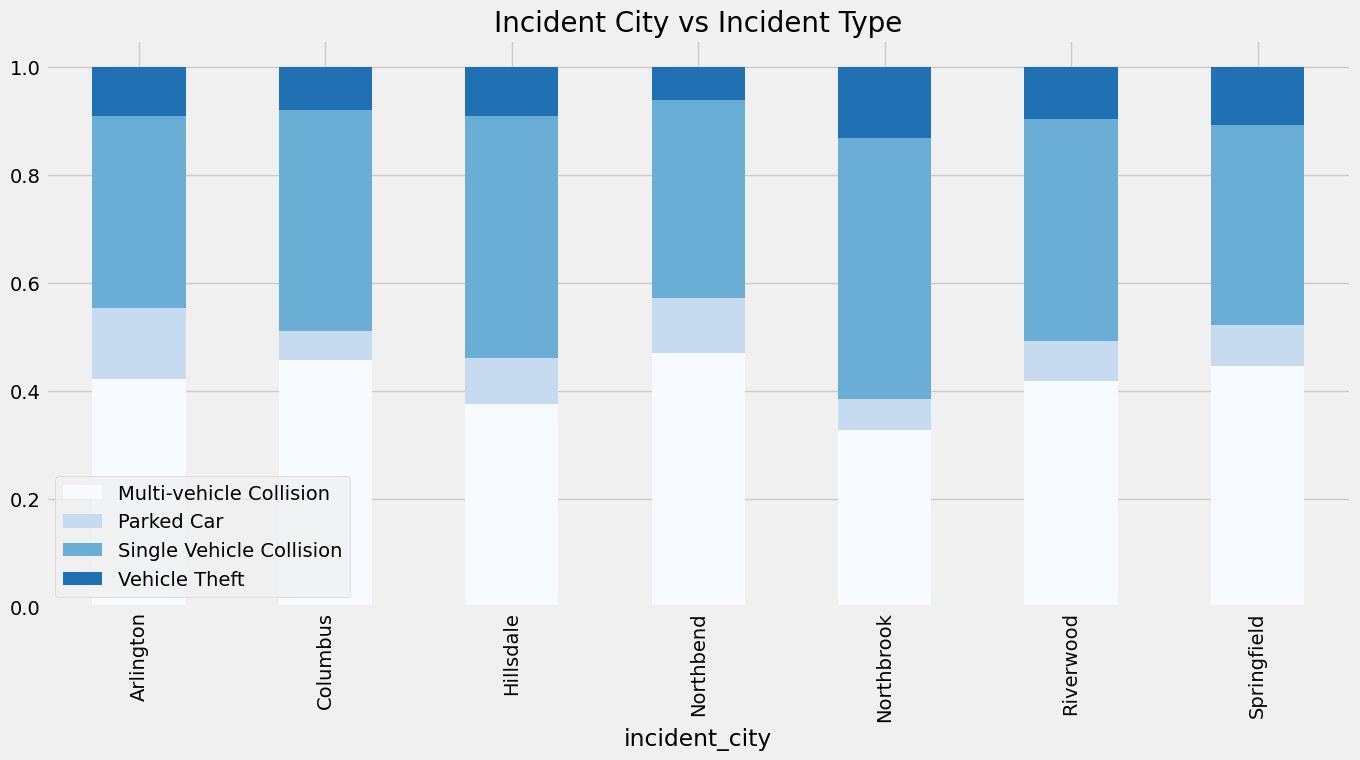

In [ ]:

colors = plt.cm.Blues(np.linspace(0, 1, 5))
incident.div(incident.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                           stacked = True,
                                                           figsize = (15, 7),
                                                           color = colors)

plt.title('Incident City vs Incident Type', fontsize = 20)
plt.legend()
plt.show()

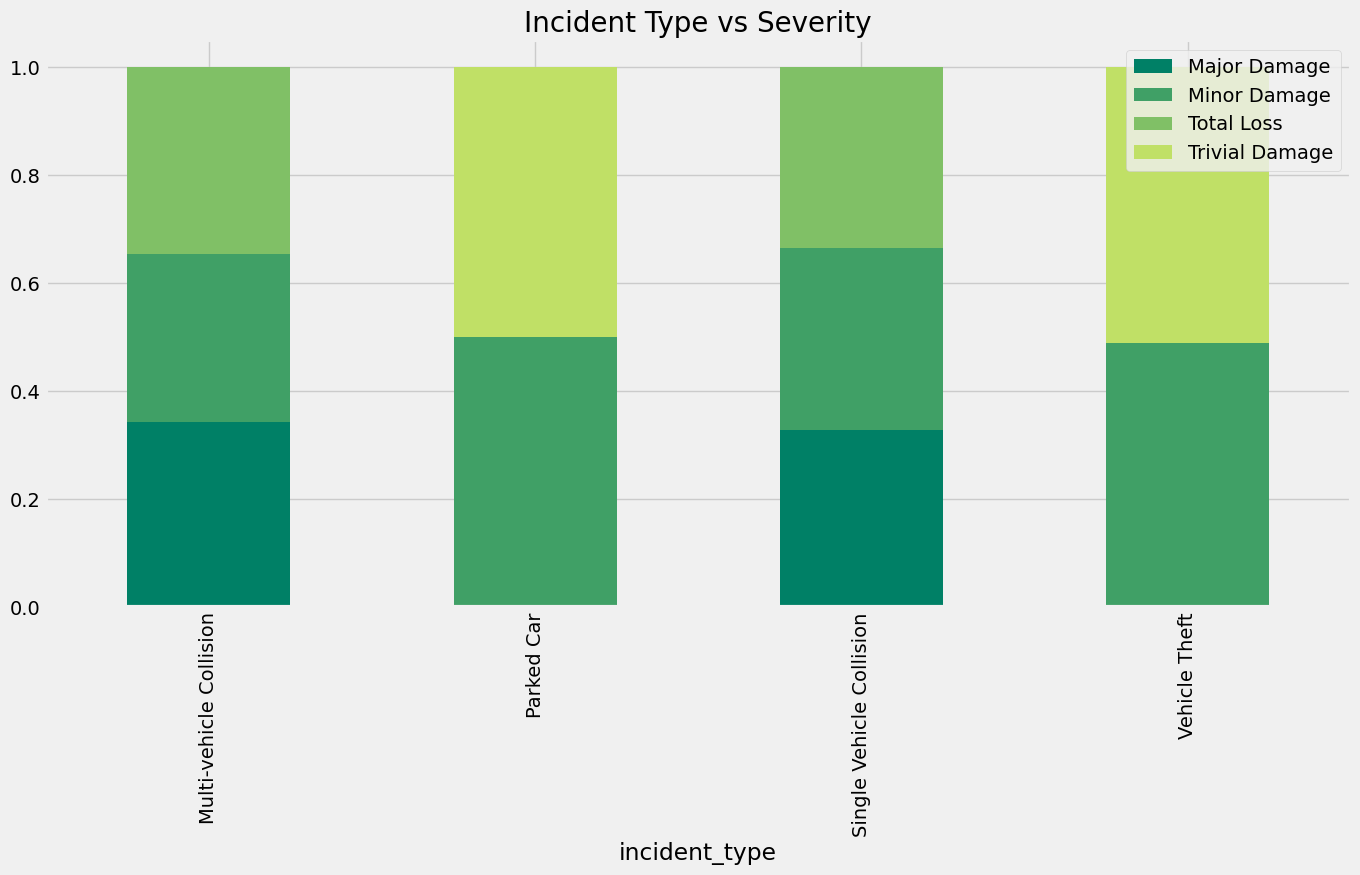

In [ ]:
incident = pd.crosstab(df['incident_type'], df['incident_severity'])
colors = plt.cm.summer(np.linspace(0, 1, 5))
incident.div(incident.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                           stacked = True,
                                                           figsize = (15, 7),
                                                           color = colors)

plt.title('Incident Type vs Severity', fontsize = 20)
plt.legend()
plt.show()

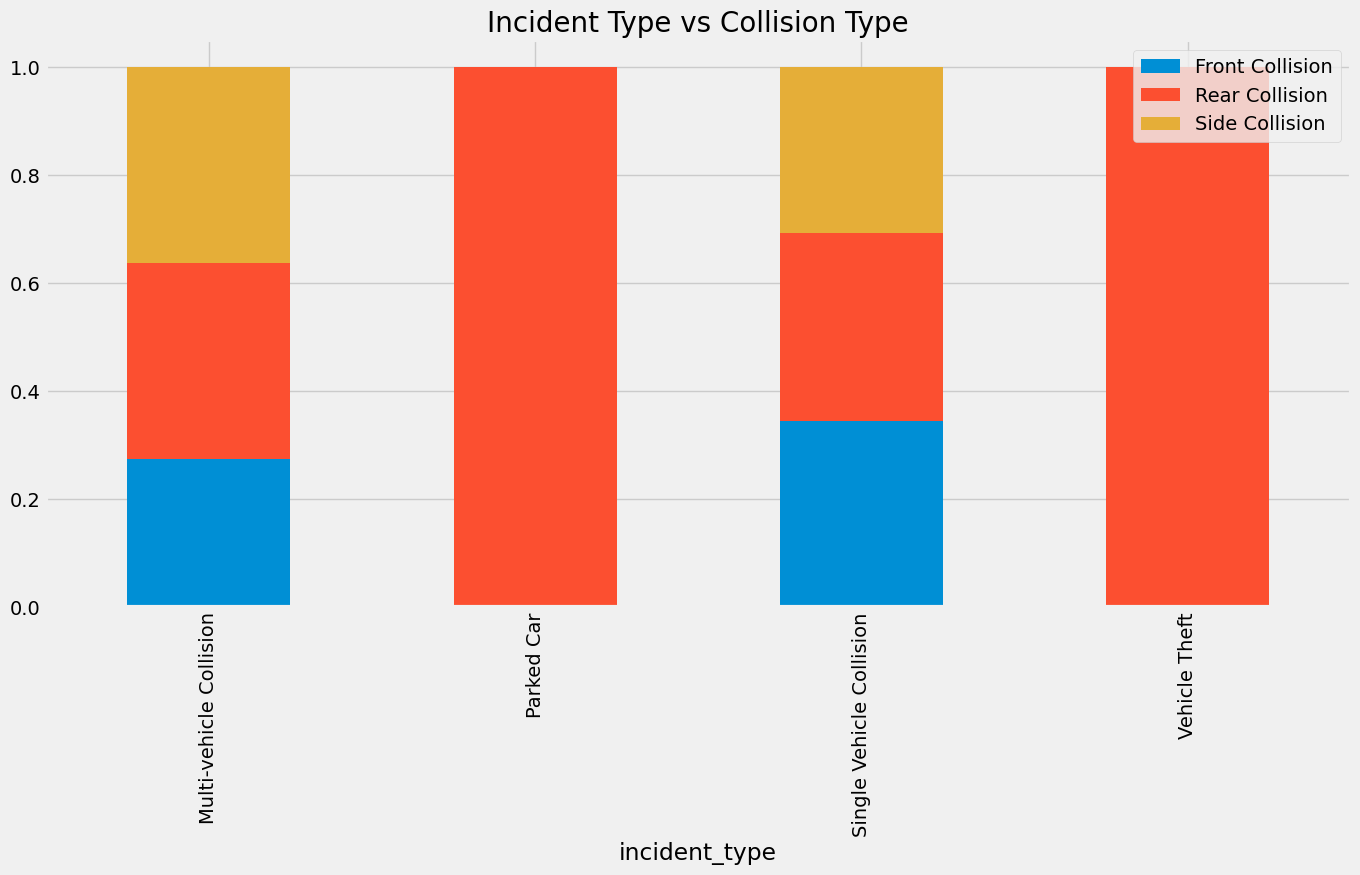

In [ ]:
incident = pd.crosstab(df['incident_type'], df['collision_type'])
#colors = plt.cm.inferno(np.linspace(0, 1, 5))
incident.div(incident.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                           stacked = True,
                                                           figsize = (15, 7))

plt.title('Incident Type vs Collision Type', fontsize = 20)
plt.legend()
plt.show()

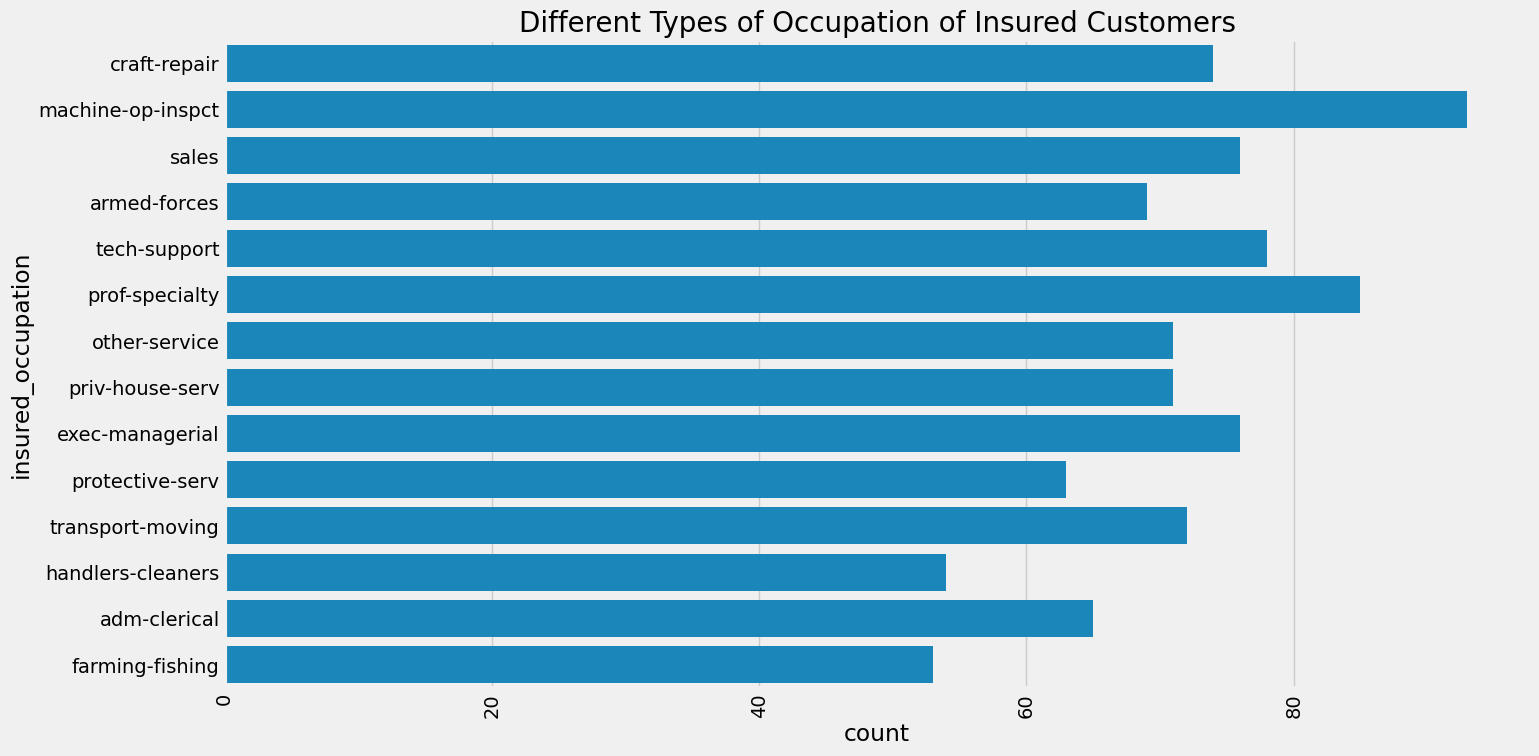

In [ ]:
sns.countplot(df['insured_occupation'])
plt.title('Different Types of Occupation of Insured Customers', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

<ipython-input-30-7f9ddb3b4fd6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['insured_hobbies'], palette = 'cool')


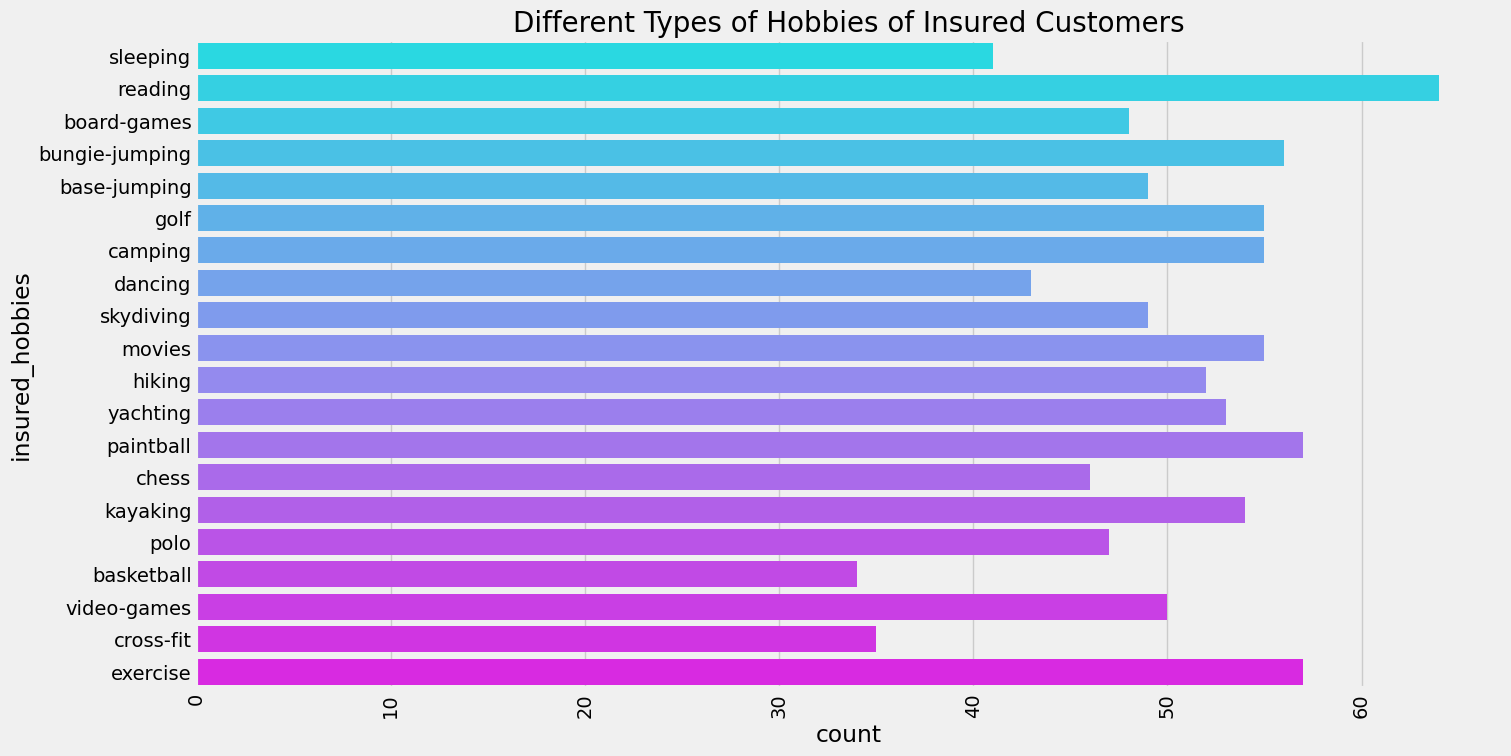

In [ ]:
sns.countplot(df['insured_hobbies'], palette = 'cool')
plt.title('Different Types of Hobbies of Insured Customers', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

<ipython-input-31-81980b597310>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['incident_type'], palette = 'spring')


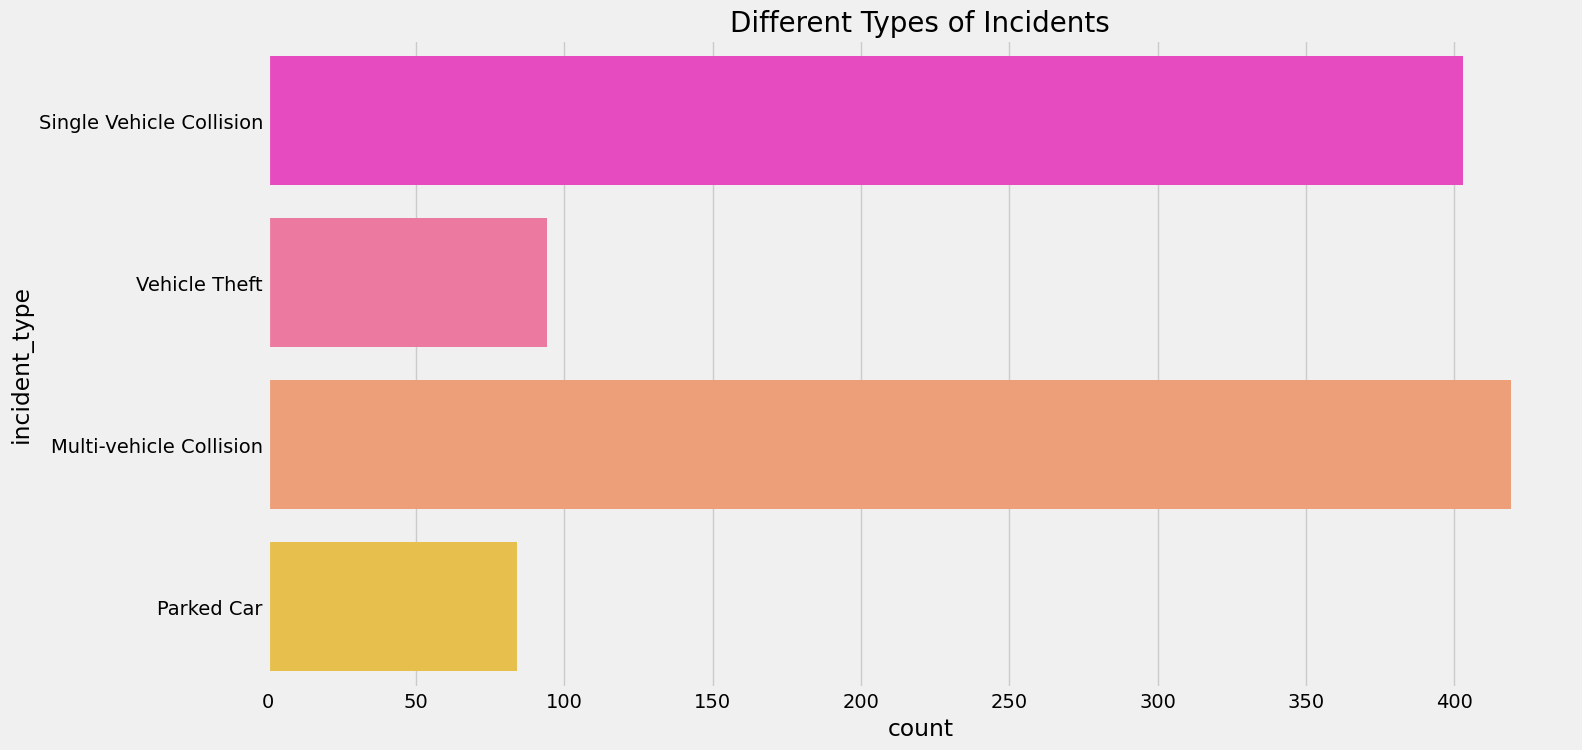

In [ ]:
sns.countplot(df['incident_type'], palette = 'spring')
plt.title('Different Types of Incidents', fontsize = 20)
plt.show()

<ipython-input-36-bfab6aa9953a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x = "policy_state", y = "total_claim_amount", data = df, palette = "copper")


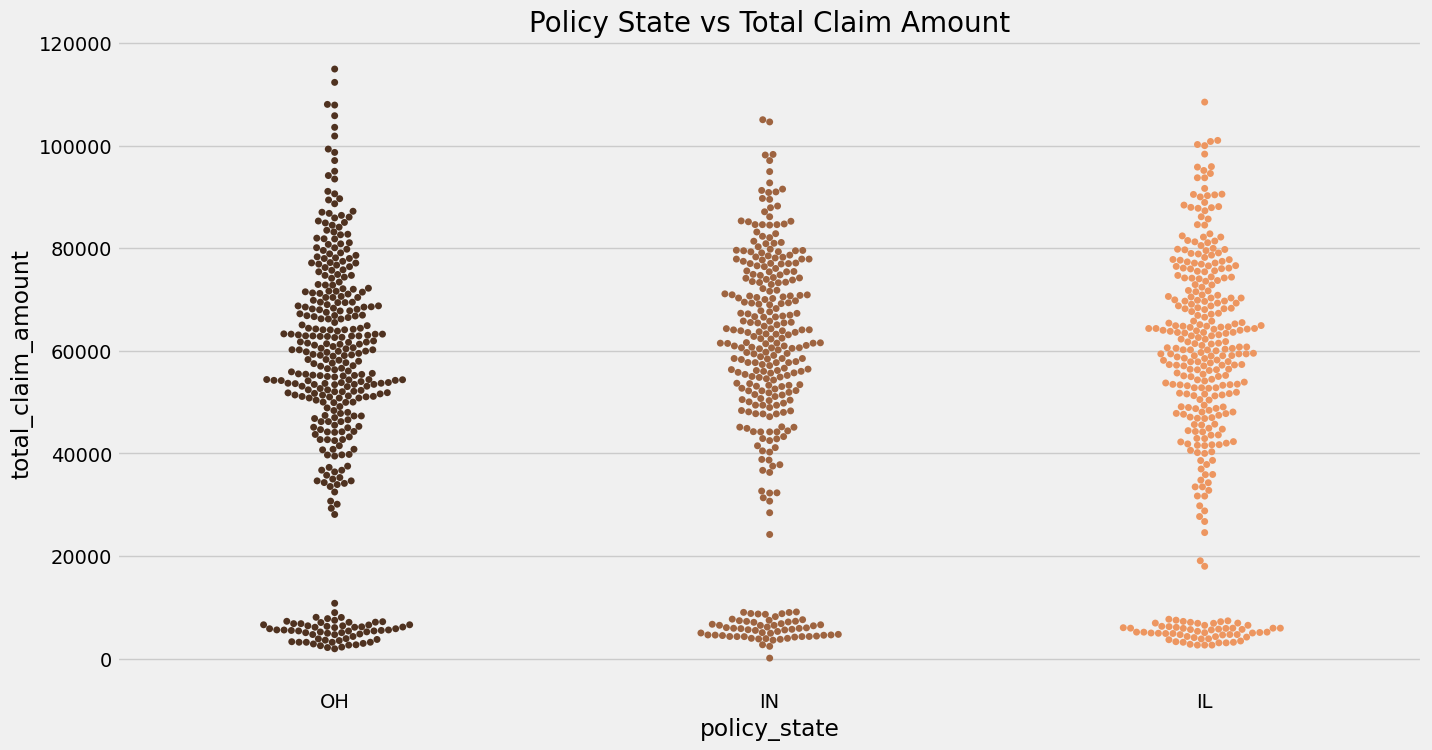

In [ ]:
# Create the swarmplot
sns.swarmplot(x = "policy_state", y = "total_claim_amount", data = df, palette = "copper")

# Set the title
plt.title('Policy State vs Total Claim Amount', fontsize = 20)

# Show the plot
plt.show()

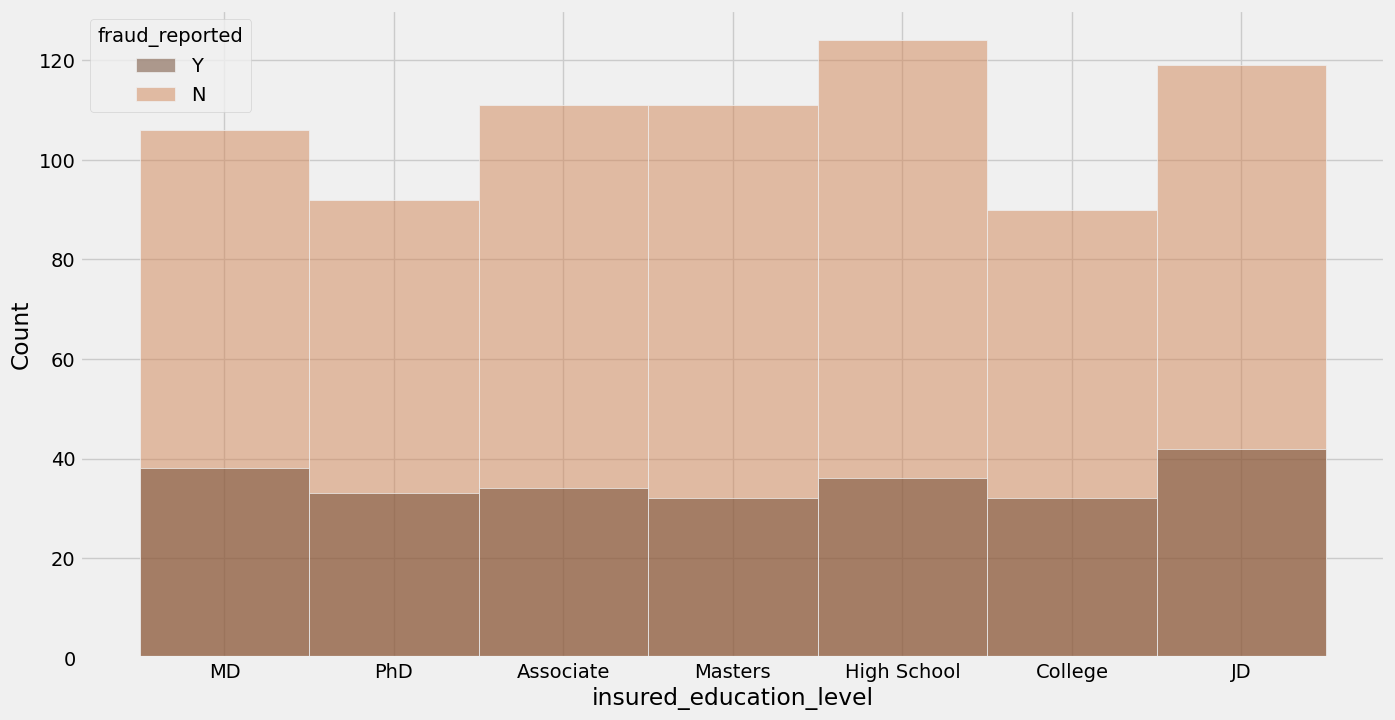

In [ ]:
sns.histplot(df,x='insured_education_level', palette = 'copper',hue='fraud_reported')
#plt.title('Policy State vs Total Claim Amount', fontsize = 20)
plt.show()

In [ ]:
!pip install bubbly

  Preparing metadata (setup.py) ... done
  Created wheel for bubbly: filename=bubbly-1.0.2-py3-none-any.whl size=5415 sha256=3e9b3aa4be4ef709516fa48b496dd1d742c0460f7d6d5f34a8968163e7b05449
  Stored in directory: /root/.cache/pip/wheels/dc/b4/ab/043c77f064dbbb38983593a3bed54363cc1910d0fb20ba6f66
Successfully built bubbly


In [ ]:
from bubbly.bubbly import bubbleplot
import plotly.offline as py
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)
import warnings
warnings.filterwarnings('ignore')

figure = bubbleplot(dataset = df, x_column = 'policy_annual_premium', y_column = 'total_claim_amount',
    bubble_column = 'insured_sex', time_column = 'auto_year', size_column = 'months_as_customer', color_column = 'insured_sex',
    x_title = "Annual Policy Premium", y_title = "Total Claim Amount", title = 'Annual Premium vs Total Claim Amount vs Months as Customer',
    x_logscale = False, scale_bubble = 3, height = 650)

py.iplot(figure, config={'scrollzoom': True})

In [ ]:
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'], errors = 'coerce')

In [ ]:
df['policy_bind_date']

0     2014-10-17
1     2006-06-27
2     2000-09-06
3     1990-05-25
4     2014-06-06
         ...    
995   1991-07-16
996   2014-01-05
997   2003-02-17
998   2011-11-18
999   1996-11-11
Name: policy_bind_date, Length: 1000, dtype: datetime64[ns]

In [ ]:
df['fraud_reported'] = df['fraud_reported'].replace(('Y','N'),(0,1))

In [ ]:
df['fraud_reported']

0      0
1      0
2      1
3      0
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: fraud_reported, Length: 1000, dtype: int64

In [ ]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.8 MB/s eta 0:00:00


In [ ]:
from category_encoders import TargetEncoder
encoder = TargetEncoder()
df['auto_model'] = encoder.fit_transform(df['auto_model'], df['fraud_reported'])

In [ ]:
df['auto_model']

0      0.726288
1      0.744809
2      0.681579
3      0.676368
4      0.803741
         ...   
995    0.758386
996    0.732783
997    0.726500
998    0.678645
999    0.744809
Name: auto_model, Length: 1000, dtype: float64

In [ ]:
df['auto_model'].value_counts()

0.726288    56
0.681579    43
0.868189    42
0.801500    40
0.733324    37
0.824733    37
0.773616    36
0.721348    35
0.732783    33
0.678645    32
0.822744    32
0.841506    31
0.860466    30
0.824856    28
0.794304    27
0.744809    27
0.670565    27
0.782256    25
0.757357    25
0.751204    24
0.726259    24
0.676368    24
0.819960    23
0.720057    23
0.663877    22
0.738854    22
0.688869    22
0.732676    21
0.776500    20
0.676500    20
0.726500    20
0.839182    18
0.689126    18
0.676550    16
0.720406    15
0.758386    13
0.803741    12
Name: auto_model, dtype: int64

In [ ]:
df['auto_make'] = encoder.fit_transform(df['auto_make'], df['fraud_reported'])

In [ ]:
df['auto_make']

0      0.774946
1      0.662543
2      0.750007
3      0.723792
4      0.808368
         ...   
995    0.745676
996    0.720853
997    0.762477
998    0.696076
999    0.662543
Name: auto_make, Length: 1000, dtype: float64

In [ ]:
df['police_report_available'] = encoder.fit_transform(df['police_report_available'], df['fraud_reported'])

In [ ]:
df['police_report_available']

0      0.770701
1      0.744898
2      0.744898
3      0.744898
4      0.744898
         ...   
995    0.744898
996    0.744898
997    0.770701
998    0.770701
999    0.744898
Name: police_report_available, Length: 1000, dtype: float64

In [ ]:
df['property_damage'] = encoder.fit_transform(df['property_damage'], df['fraud_reported'])

In [ ]:
df['incident_city'] = encoder.fit_transform(df['incident_city'], df['fraud_reported'])

In [ ]:
df['incident_state'] = encoder.fit_transform(df1['incident_state'], df['fraud_reported'])

In [ ]:
df['incident_state']

0      0.705645
1      0.772725
2      0.778626
3      0.645130
4      0.778626
         ...   
995    0.690917
996    0.705645
997    0.690917
998    0.778626
999    0.820276
Name: incident_state, Length: 1000, dtype: float64

In [ ]:
df['authorities_contacted'] = encoder.fit_transform(df1['authorities_contacted'], df['fraud_reported'])

In [ ]:
df['incident_severity'] = encoder.fit_transform(df1['incident_severity'], df['fraud_reported'])

In [ ]:
df['collision_type'] = encoder.fit_transform(df1['collision_type'], df['fraud_reported'])

In [ ]:
df['incident_type'] = encoder.fit_transform(df1['incident_type'], df['fraud_reported'])

In [ ]:
df['incident_date'] = pd.to_datetime(df['incident_date'], errors = 'coerce')
df['incident_month'] = df['incident_date'].dt.month
df['incident_day'] = df['incident_date'].dt.day

In [ ]:
df['insured_relationship'] = encoder.fit_transform(df1['insured_relationship'], df['fraud_reported'])

In [ ]:
df['insured_hobbies'] = encoder.fit_transform(df1['insured_hobbies'], df['fraud_reported'])

In [ ]:
df['insured_hobbies'] = encoder.fit_transform(df1['insured_hobbies'], df['fraud_reported'])

In [ ]:
df['insured_occupation'] = encoder.fit_transform(df1['insured_occupation'], df['fraud_reported'])

In [ ]:
df['insured_education_level'] = encoder.fit_transform(df1['insured_education_level'], df['fraud_reported'])

In [ ]:
df['insured_sex'] = encoder.fit_transform(df1['insured_sex'], df['fraud_reported'])

In [ ]:
df['policy_csl'] = encoder.fit_transform(df1['policy_csl'], df['fraud_reported'])

In [ ]:
df['policy_state'] = encoder.fit_transform(df1['policy_state'], df['fraud_reported'])

In [ ]:
df = df.drop(['policy_number','policy_bind_date', 'incident_date','incident_location','auto_model'], axis = 1)

# let's check the columns after deleting the columns
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_year', 'fraud_reported', 'incident_month', 'incident_day'],
      dtype='object')

In [ ]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported,incident_month,incident_day
0,328,48,0.741477,0.737892,1000,1406.91,0,466132,0.738661,0.736111,...,0.770701,71610,6510,13020,52080,0.774946,2004,0,1,25
1,228,42,0.745161,0.737892,2000,1197.22,5000000,468176,0.738661,0.736111,...,0.744898,5070,780,780,3510,0.662543,2007,0,1,21
2,134,29,0.741477,0.742120,2000,1413.14,5000000,430632,0.765363,0.736000,...,0.744898,34650,7700,3850,23100,0.750007,2007,1,2,22
3,256,41,0.772189,0.737892,2000,1415.74,6000000,608117,0.765363,0.736000,...,0.744898,63400,6340,6340,50720,0.723792,2014,0,1,10
4,228,44,0.772189,0.783333,1000,1583.91,6000000,610706,0.738661,0.765517,...,0.744898,6500,1300,650,4550,0.808368,2009,1,2,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,0.741477,0.783333,1000,1310.80,0,431289,0.765363,0.776224,...,0.744898,87200,17440,8720,61040,0.745676,2006,1,2,22
996,285,41,0.772189,0.742120,1000,1436.79,0,608177,0.765363,0.736000,...,0.744898,108480,18080,18080,72320,0.720853,2015,1,1,24
997,130,34,0.741477,0.737892,500,1383.49,3000000,442797,0.765363,0.776224,...,0.770701,67500,7500,7500,52500,0.762477,1996,1,1,23
998,458,62,0.772189,0.783333,2000,1356.92,5000000,441714,0.738661,0.765517,...,0.770701,46980,5220,5220,36540,0.696076,1998,1,2,26


In [ ]:
x3 = df.drop(['fraud_reported'], axis = 1)
y3 = df['fraud_reported']

print("Shape of x2 :", x3.shape)
print("Shape of y2 :", y3.shape)

Shape of x2 : (1000, 35)
Shape of y2 : (1000,)


In [ ]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset
                    #print(dataset[colname])
    return dataset
xnew=correlation(x3,0.9)
xnew.head()

,months_as_customer,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,auto_make,auto_year,incident_month,incident_day
0,328,0.741477,0.737892,1000,1406.91,0,466132,0.738661,0.736111,0.702929,...,1,2,0.770701,71610,6510,13020,0.774946,2004,1,25
1,228,0.745161,0.737892,2000,1197.22,5000000,468176,0.738661,0.736111,0.763434,...,0,0,0.744898,5070,780,780,0.662543,2007,1,21
2,134,0.741477,0.742120,2000,1413.14,5000000,430632,0.765363,0.736000,0.723792,...,2,3,0.744898,34650,7700,3850,0.750007,2007,2,22
3,256,0.772189,0.737892,2000,1415.74,6000000,608117,0.765363,0.736000,0.753619,...,1,2,0.744898,63400,6340,6340,0.723792,2014,1,10
4,228,0.772189,0.783333,1000,1583.91,6000000,610706,0.738661,0.765517,0.723792,...,0,1,0.744898,6500,1300,650,0.808368,2009,2,17


In [ ]:
import statsmodels.formula.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)

    regressor_OLS.summary()
    return x, columns

In [ ]:
# xnew1=backwardElimination(xnew,y3,0.05,xnew.columns)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(xnew,y3, test_size = 0.25, random_state = 42)

print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (750, 32)
Shape of x_test : (250, 32)
Shape of y_train : (750,)
Shape of y_test : (250,)


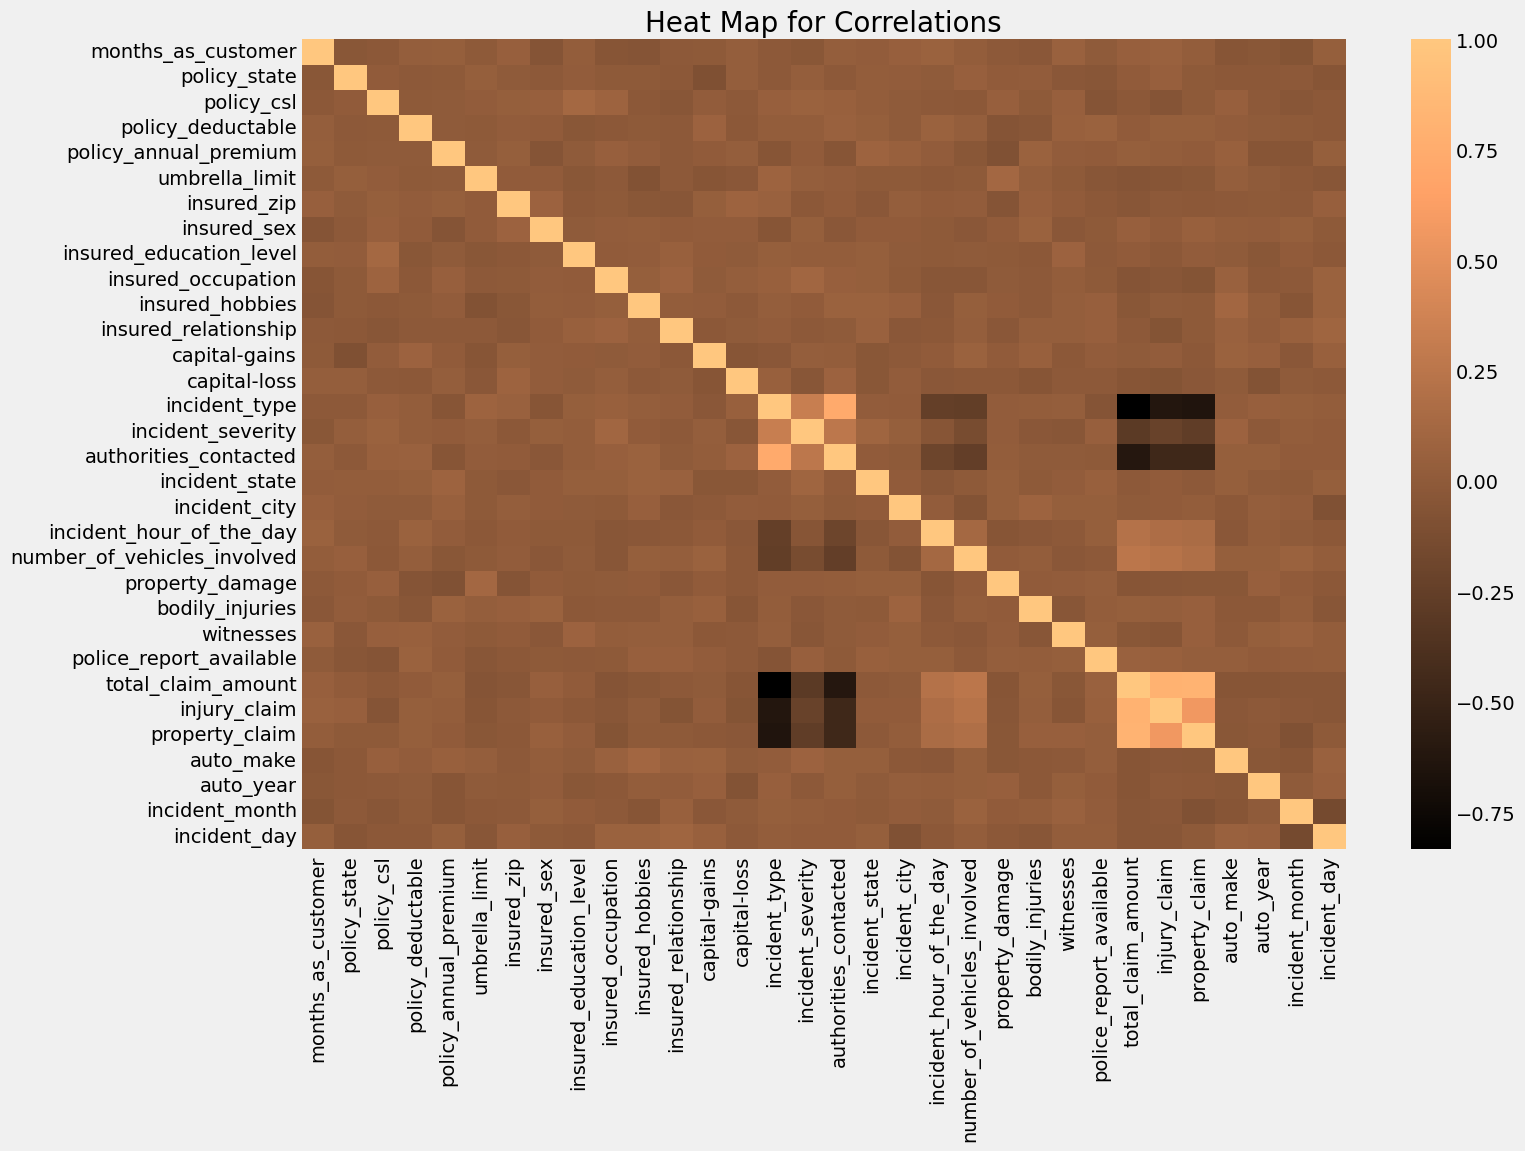

In [ ]:
plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(x_train.corr(), cmap = 'copper')
plt.title('Heat Map for Correlations', fontsize = 20)
plt.show()

Modelling with Ensemble Methods

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
model= RandomForestClassifier( oob_score = True, n_estimators= 100, n_jobs= -1, min_samples_split = 10, max_features='log2', max_depth = None)
model1= GradientBoostingClassifier(n_estimators= 100,min_samples_split = 10, max_features='log2', max_depth = None)

Training Accuracy:  0.9826666666666667
Testing Accuarcy:  0.796
              precision    recall  f1-score   support

           0       0.67      0.46      0.55        67
           1       0.82      0.92      0.87       183

    accuracy                           0.80       250
   macro avg       0.75      0.69      0.71       250
weighted avg       0.78      0.80      0.78       250



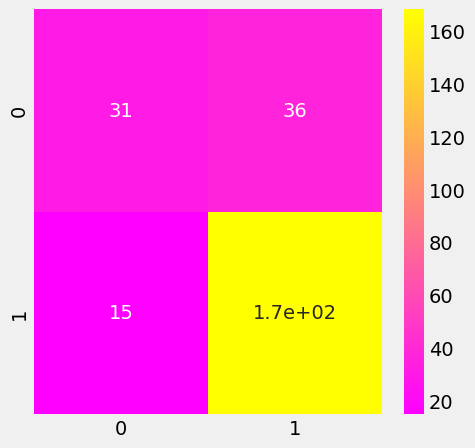

In [ ]:
model.fit(x_train, y_train)
y_pred_rf = model.predict(x_test)

print("Training Accuracy: ", model.score(x_train, y_train))
print('Testing Accuarcy: ', model.score(x_test, y_test))

cr = classification_report(y_test,  y_pred_rf)
print(cr)

plt.rcParams['figure.figsize'] = (5, 5)
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot = True, cmap = 'spring')
plt.show()

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
feat_importances = pd.Series(model.feature_importances_, index=xnew.columns)
feat_importances.nlargest(10).plot(kind='barh')

<Axes: >

Training Accuracy:  1.0
Testing Accuarcy:  0.788
              precision    recall  f1-score   support

           0       0.63      0.51      0.56        67
           1       0.83      0.89      0.86       183

    accuracy                           0.79       250
   macro avg       0.73      0.70      0.71       250
weighted avg       0.78      0.79      0.78       250



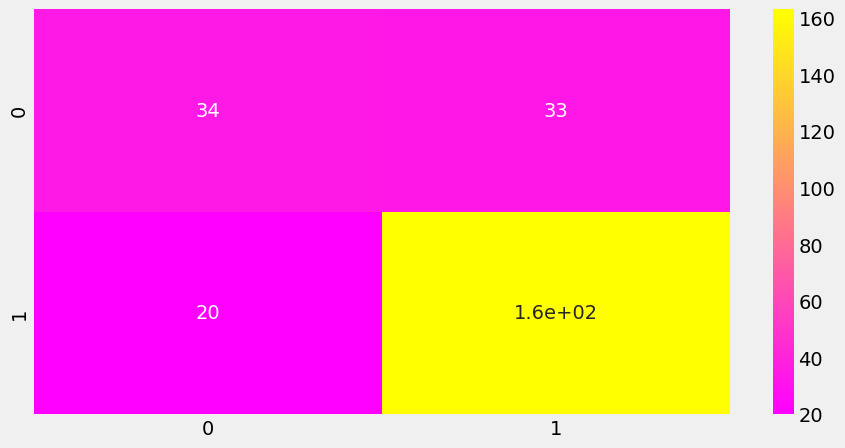

In [ ]:
model1.fit(x_train, y_train)
y_pred_rf1 = model1.predict(x_test)

print("Training Accuracy: ", model1.score(x_train, y_train))
print('Testing Accuarcy: ', model1.score(x_test, y_test))

cr1 = classification_report(y_test,  y_pred_rf1)
print(cr1)

plt.rcParams['figure.figsize'] = (5, 5)
cm1 = confusion_matrix(y_test, y_pred_rf1)
sns.heatmap(cm1, annot = True, cmap = 'spring')
plt.show()

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
feat_importances = pd.Series(model1.feature_importances_, index=xnew.columns)
feat_importances.nlargest(10).plot(kind='barh')

<Axes: >

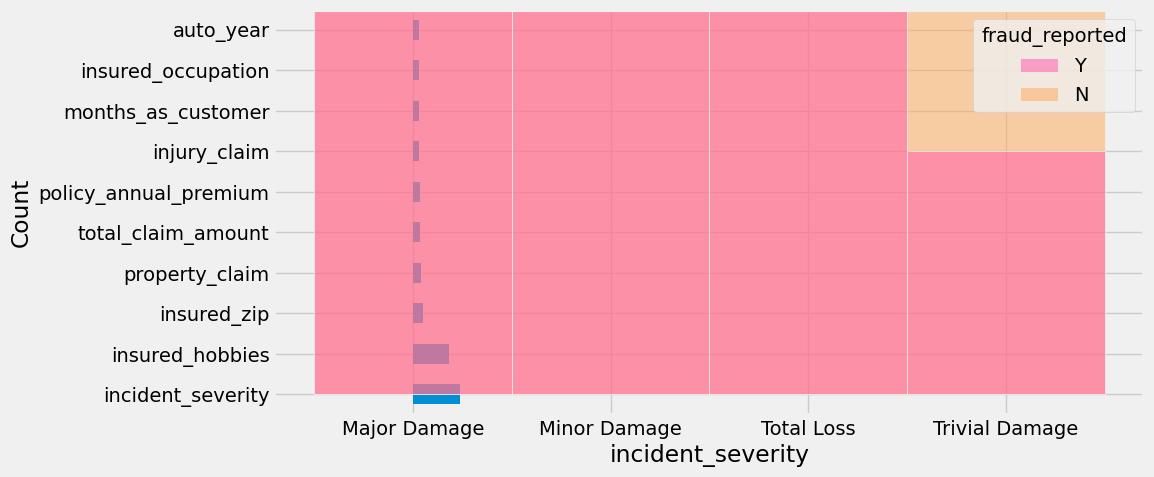

In [ ]:
sns.histplot(df1,x='incident_severity', palette = 'spring',hue='fraud_reported')
#plt.title('Policy State vs Total Claim Amount', fontsize = 20)
plt.show()

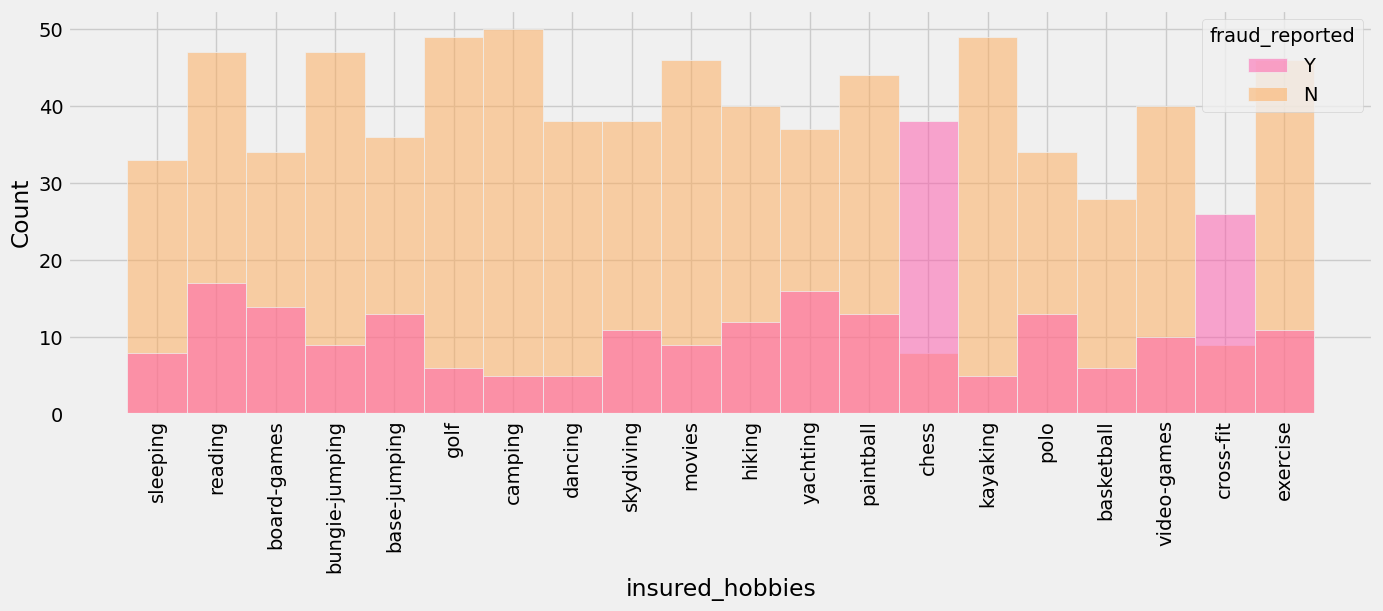

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5
sns.histplot(df1,x='insured_hobbies', palette = 'spring',hue='fraud_reported')
#plt.title('Policy State vs Total Claim Amount', fontsize = 20)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# import pickle
# filename = '/Users/arpan/Streamlit_Demo/Data/Grad_Boost.sav'
# pickle.dump(model1, open(filename, 'wb'))
# pickle.dump(encoder, open('/Users/arpan/Streamlit_Demo/Data/target_encoder.pkl', 'wb'))